In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

In [6]:
y_train.shape

(60000,)

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
x_train  = x_train.astype('float32')
x_test = x_test.astype('float32')

In [11]:
x_train.dtype

dtype('float32')

In [12]:
x_train /= 255
x_test /= 255

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [14]:
model = Sequential()
model.add(Conv2D(28, kernel_size = (3, 3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = x_train, y = y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3610 - accuracy: 0.8933
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0898 - accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0607 - accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0433 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0341 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0259 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0238 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0172 - accuracy: 0.9940
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0176 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 29s 16m

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0588 - accuracy: 0.9859


[0.058782514184713364, 0.9858999848365784]

5


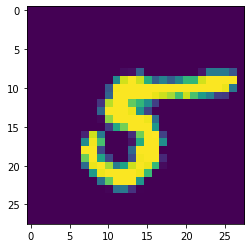

In [17]:
image_index = 9998
plt.imshow(x_test[image_index].reshape(28, 28))
predict = x_test[image_index].reshape(28, 28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

# TEST 1 with REAL WORLD INPUT

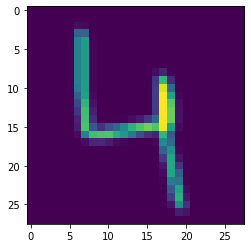

In [18]:
import cv2
import numpy as np

#Test 1
img = cv2.imread("test_images/4.png", 0)
img = cv2.GaussianBlur(img, (15, 15), 0)
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)

plt.imshow(img)

In [19]:
img.shape

(28, 28)

In [20]:
data = []
rows, cols = img.shape
for i in range(rows):
    for j in range(cols):
        k = img[i, j]
        data.append(k)

test_img = np.array(data)

In [21]:
img_tf = test_img.reshape(28, 28, 1)

In [22]:
img_tf.shape

(28, 28, 1)

4


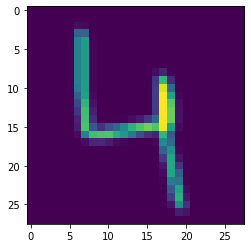

In [23]:
plt.imshow(img_tf.reshape(28, 28))
predict = img_tf.reshape(28, 28)
pred = model.predict(img_tf.reshape(1, 28, 28, 1))
print(pred.argmax())

# TEST 2 with REAL WORLD INPUT

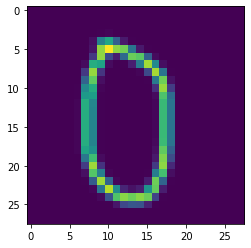

In [24]:
import cv2
import numpy as np

#Test 2
img = cv2.imread("test_images/0.png", 0)
img = cv2.GaussianBlur(img, (15, 15), 0)
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)

plt.imshow(img)

In [25]:
img.shape

(28, 28)

In [26]:
data = []
rows, cols = img.shape
for i in range(rows):
    for j in range(cols):
        k = img[i, j]
        data.append(k)

test_img = np.array(data)

In [27]:
img_tf = test_img.reshape(28, 28, 1)

In [28]:
img_tf.shape

(28, 28, 1)

0


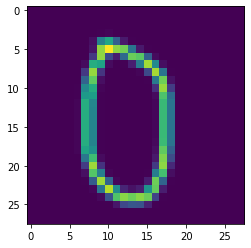

In [29]:
plt.imshow(img_tf.reshape(28, 28))
predict = img_tf.reshape(28, 28)
pred = model.predict(img_tf.reshape(1, 28, 28, 1))
print(pred.argmax())